# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

Write the problem statement and objectives here


### Data Dictionary

Mention the data dictionary here

### Let us start by importing the required libraries

In [1]:
# Write your code here to import necessary libraries for the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
# Write your code here to read the data
data_food_hub = pd.read_csv('/content/drive/My Drive/PGP: AIML University Of Texas/Assignment - FoodHub/foodhub_order.csv')

In [4]:
# Write your code here to view the first 5 rows
print(data_food_hub.head())

   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
print('Rows count =',data_food_hub.shape[0],'\nColumns count =',data_food_hub.shape[1])

Rows count = 1898 
Columns count = 9


#### Observations:
Dataset contains 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Write your code here
print(data_food_hub.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations:
* There are 5 numeric data columns and 4 categoric
(string) data columns in the given dataset.
* There are no null values.
* 1 out of 5 numeric data column i.e. 'cost_of_the_order' contains float values.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Write your code here
print(data_food_hub.isnull().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
*   No, there are no null values in any column.



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Write your code here
print(data_food_hub.describe())

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  


#### Observations:
**Food preparation time: **
*   It takes minimum 20 mins and maximum 35 mins to prepare a food once the order is placed.
*   As per the observation the average time to prepare food is 27.371970







### **Question 5:** How many orders are not rated? [1 mark]

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


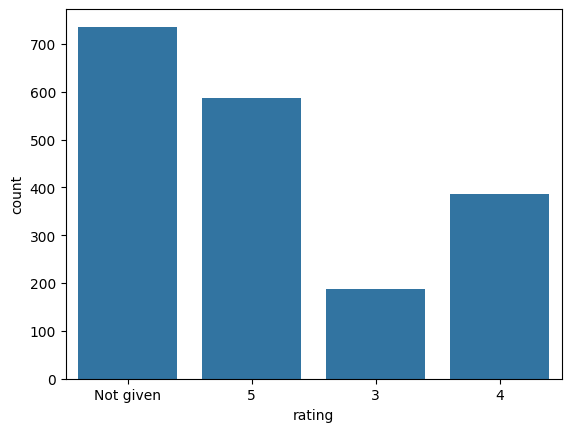

In [9]:
# Write the code here
print(data_food_hub['rating'].value_counts())
sns.countplot(x='rating', data=data_food_hub)
plt.show()

### Observations:
#### There are 736 orders for which rating was not given.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

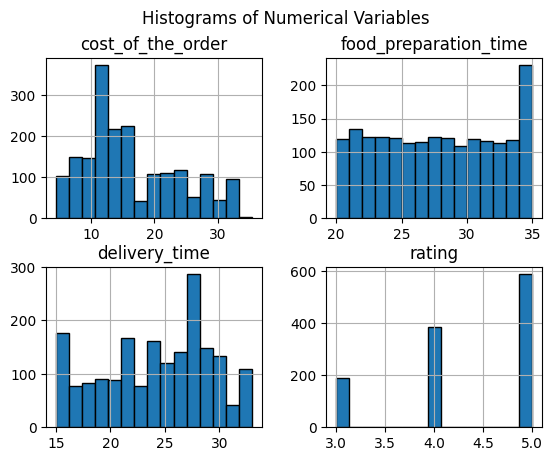

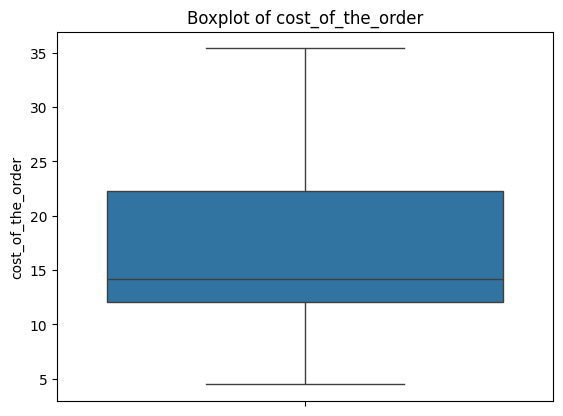

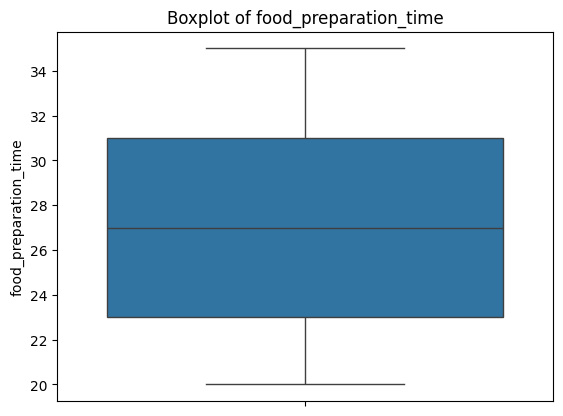

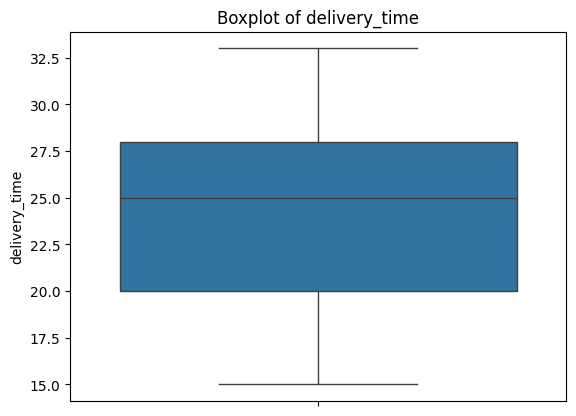

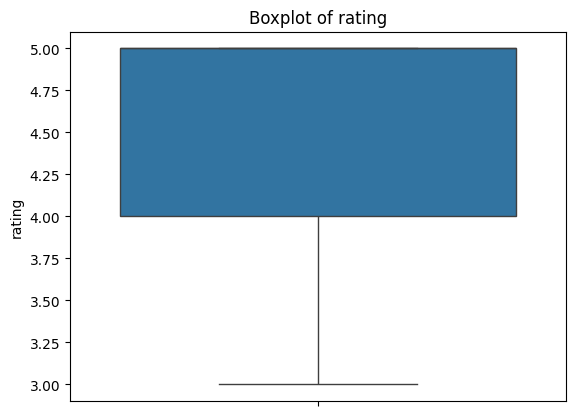

In [10]:
# Write the code here
data_food_hub['rating'] = pd.to_numeric(data_food_hub['rating'], errors='coerce')

# Plot histograms for numerical variables
num_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
data_food_hub[num_columns].hist( bins=15, edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')

plt.show()

# Plot boxplots for numerical variables

for i, col in enumerate(num_columns, 1):
    sns.boxplot(y=data_food_hub[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


### Observation:
####


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


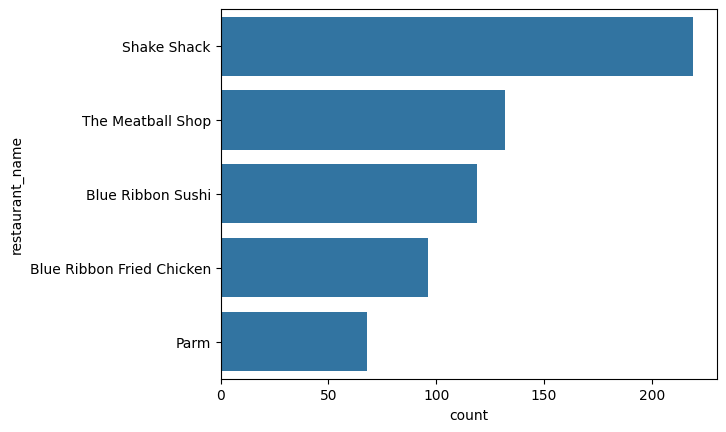

In [11]:
# Write the code here
print(data_food_hub.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head(5))
sns.countplot(y='restaurant_name', data=data_food_hub, order=data_food_hub['restaurant_name'].value_counts().iloc[:5].index)
plt.show()

#### Observations:
From the above calculation and plot it is clear that the top 5 restaurants based on order counts are -

1. Shake Shack (219 orders)
2. The Meatball Shop (132 orders)
3. Blue Ribbon Sushi (119 orders)
4. Blue Ribbon Fried Chicken (96 orders)
5. Parm (68 orders)



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

cuisine_type
American    415
Japanese    335
Italian     207
Name: order_id, dtype: int64


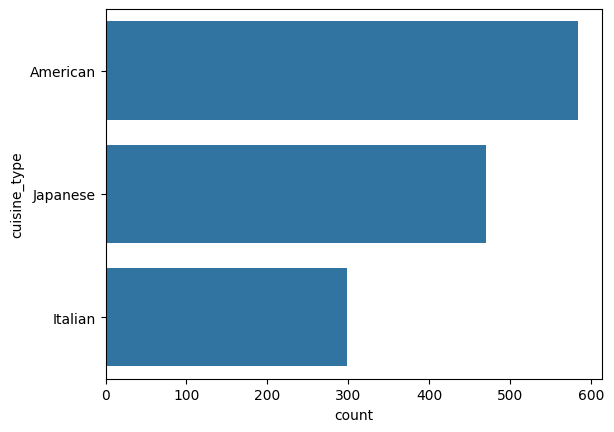

In [12]:
# Write the code here
print(data_food_hub[data_food_hub['day_of_the_week']=='Weekend'].groupby('cuisine_type')['order_id'].count().sort_values(ascending=False).head(3))
sns.countplot(y='cuisine_type', data=data_food_hub, order=data_food_hub['cuisine_type'].value_counts().iloc[:3].index)
plt.show()

#### Observations:
* The most popular cuisine is American.
* The second one is Japenese and the third is Italian.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

Percentage of orders cost more than 20 Dollars = 29.24130663856691


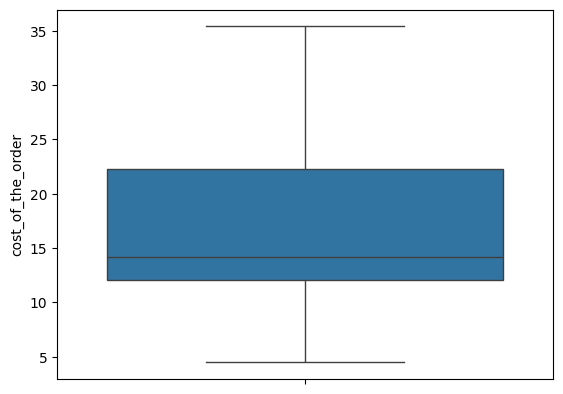

In [13]:
# Write the code here
print('Percentage of orders cost more than 20 Dollars =',data_food_hub[data_food_hub['cost_of_the_order']>20]['order_id'].count()/data_food_hub['order_id'].count()*100)
sns.boxplot(y=data_food_hub['cost_of_the_order'])
plt.show()

#### Observations:
Percentage of orders cost more than 20 Dollars = 29.24130663856691
* From the box plot, it is visible that more than 25% of orders cost more than 20 Dollars as the Q3 is plotted above 20 Dollar mark.


### **Question 10**: What is the mean order delivery time? [1 mark]

Mean of delivery time = 24.161749209694417


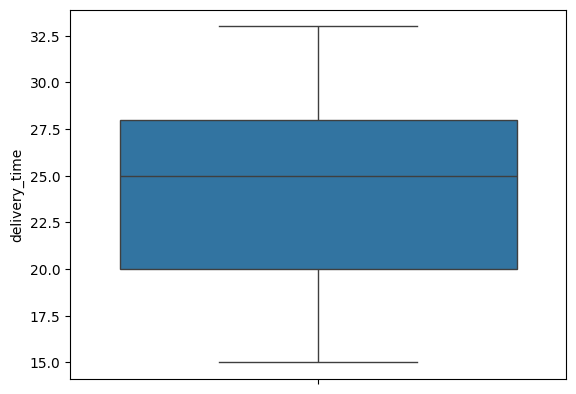

In [14]:
# Write the code here
print( 'Mean of delivery time =',data_food_hub['delivery_time'].mean())
sns.boxplot(y=data_food_hub['delivery_time'])
plt.show()

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64


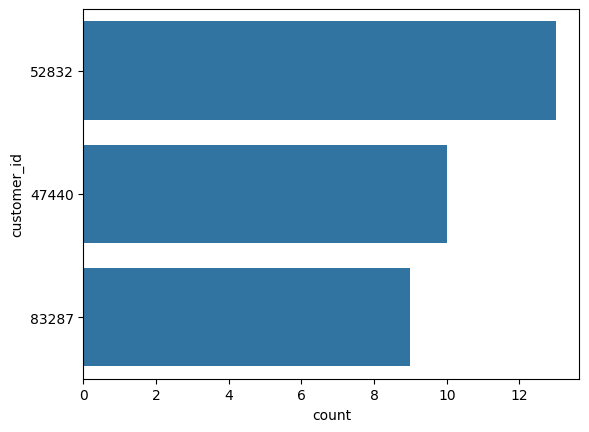

In [15]:
# Write the code here
print(data_food_hub.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3))
sns.countplot(y='customer_id', data=data_food_hub, order=data_food_hub['customer_id'].value_counts().iloc[:3].index)
plt.show()

#### Observations:


 As per above observation, the top 3 customer (ids) for 20% discount offer are -
*  52832
* 47440
* 83287



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


                       cost_of_the_order  food_preparation_time  \
cost_of_the_order               1.000000               0.041527   
food_preparation_time           0.041527               1.000000   
delivery_time                  -0.029949               0.011094   
rating                          0.033983              -0.006083   

                       delivery_time    rating  
cost_of_the_order          -0.029949  0.033983  
food_preparation_time       0.011094 -0.006083  
delivery_time               1.000000 -0.009804  
rating                     -0.009804  1.000000  


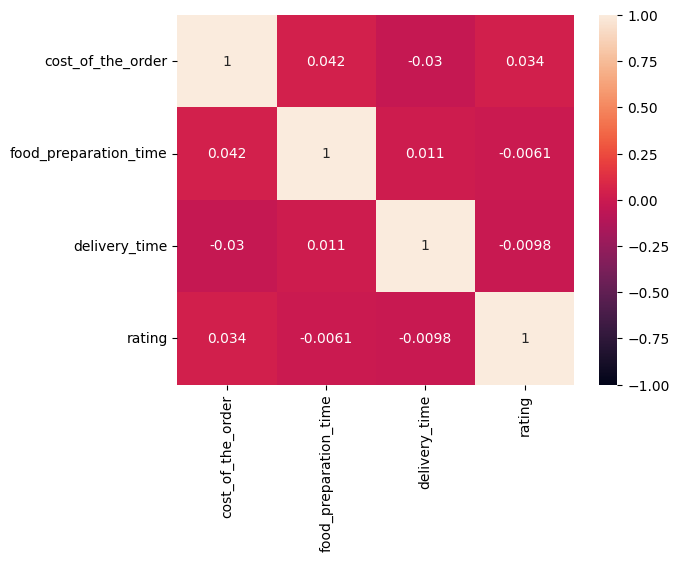

In [16]:
# Calculate the correlation matrix.
data_subset = data_food_hub.select_dtypes(include=np.number)
data_subset = data_food_hub[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']]
corr_matrix = data_subset.corr()
print(corr_matrix)
sns.heatmap(data_subset.select_dtypes(include=np.number).corr(), annot=True, vmin=-1, vmax=1)
plt.show()

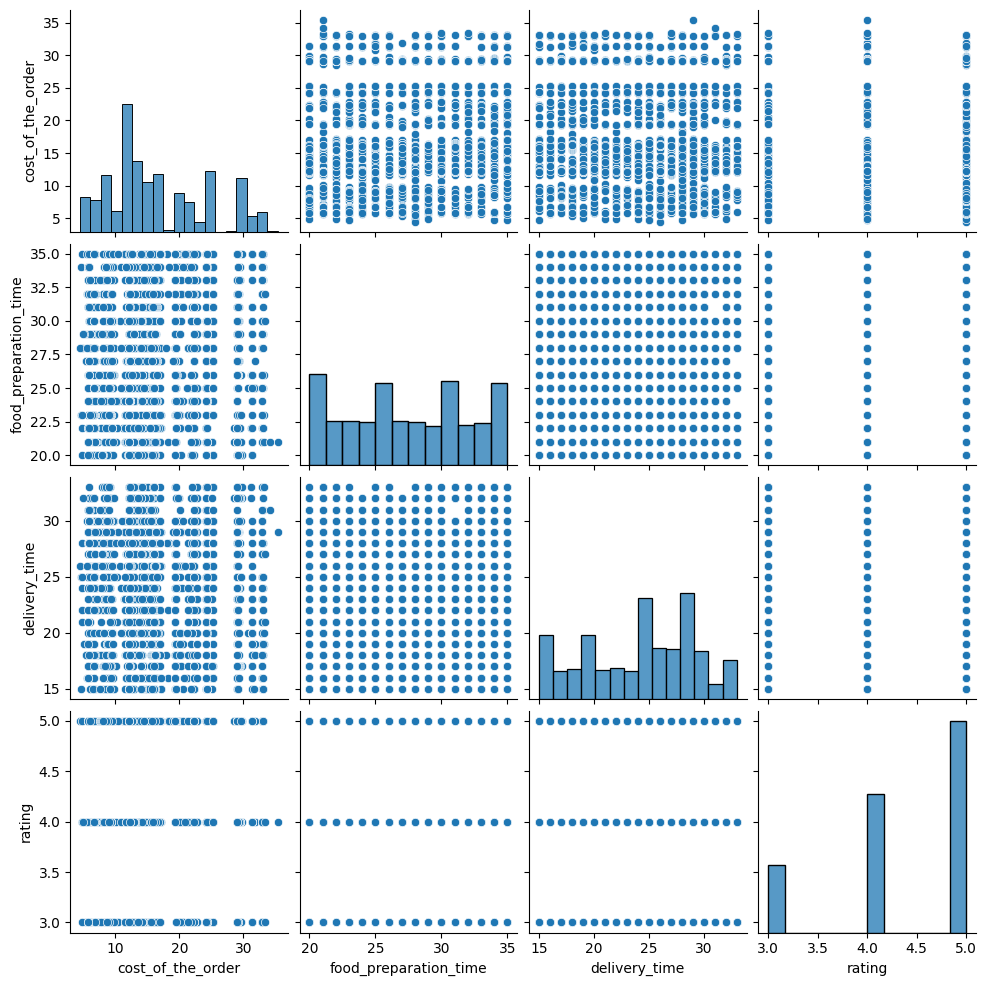

In [17]:
sns.pairplot(data_subset.select_dtypes(include=np.number))
plt.show()

#### Observation of corr between numeric variables

*   It does not seems like the data is highly correlated as the max correlation we got is 0.034 between rating and the cost of the order
*   May be it requires further eploration of data and minimize the unusual data to bind the numeric variables.



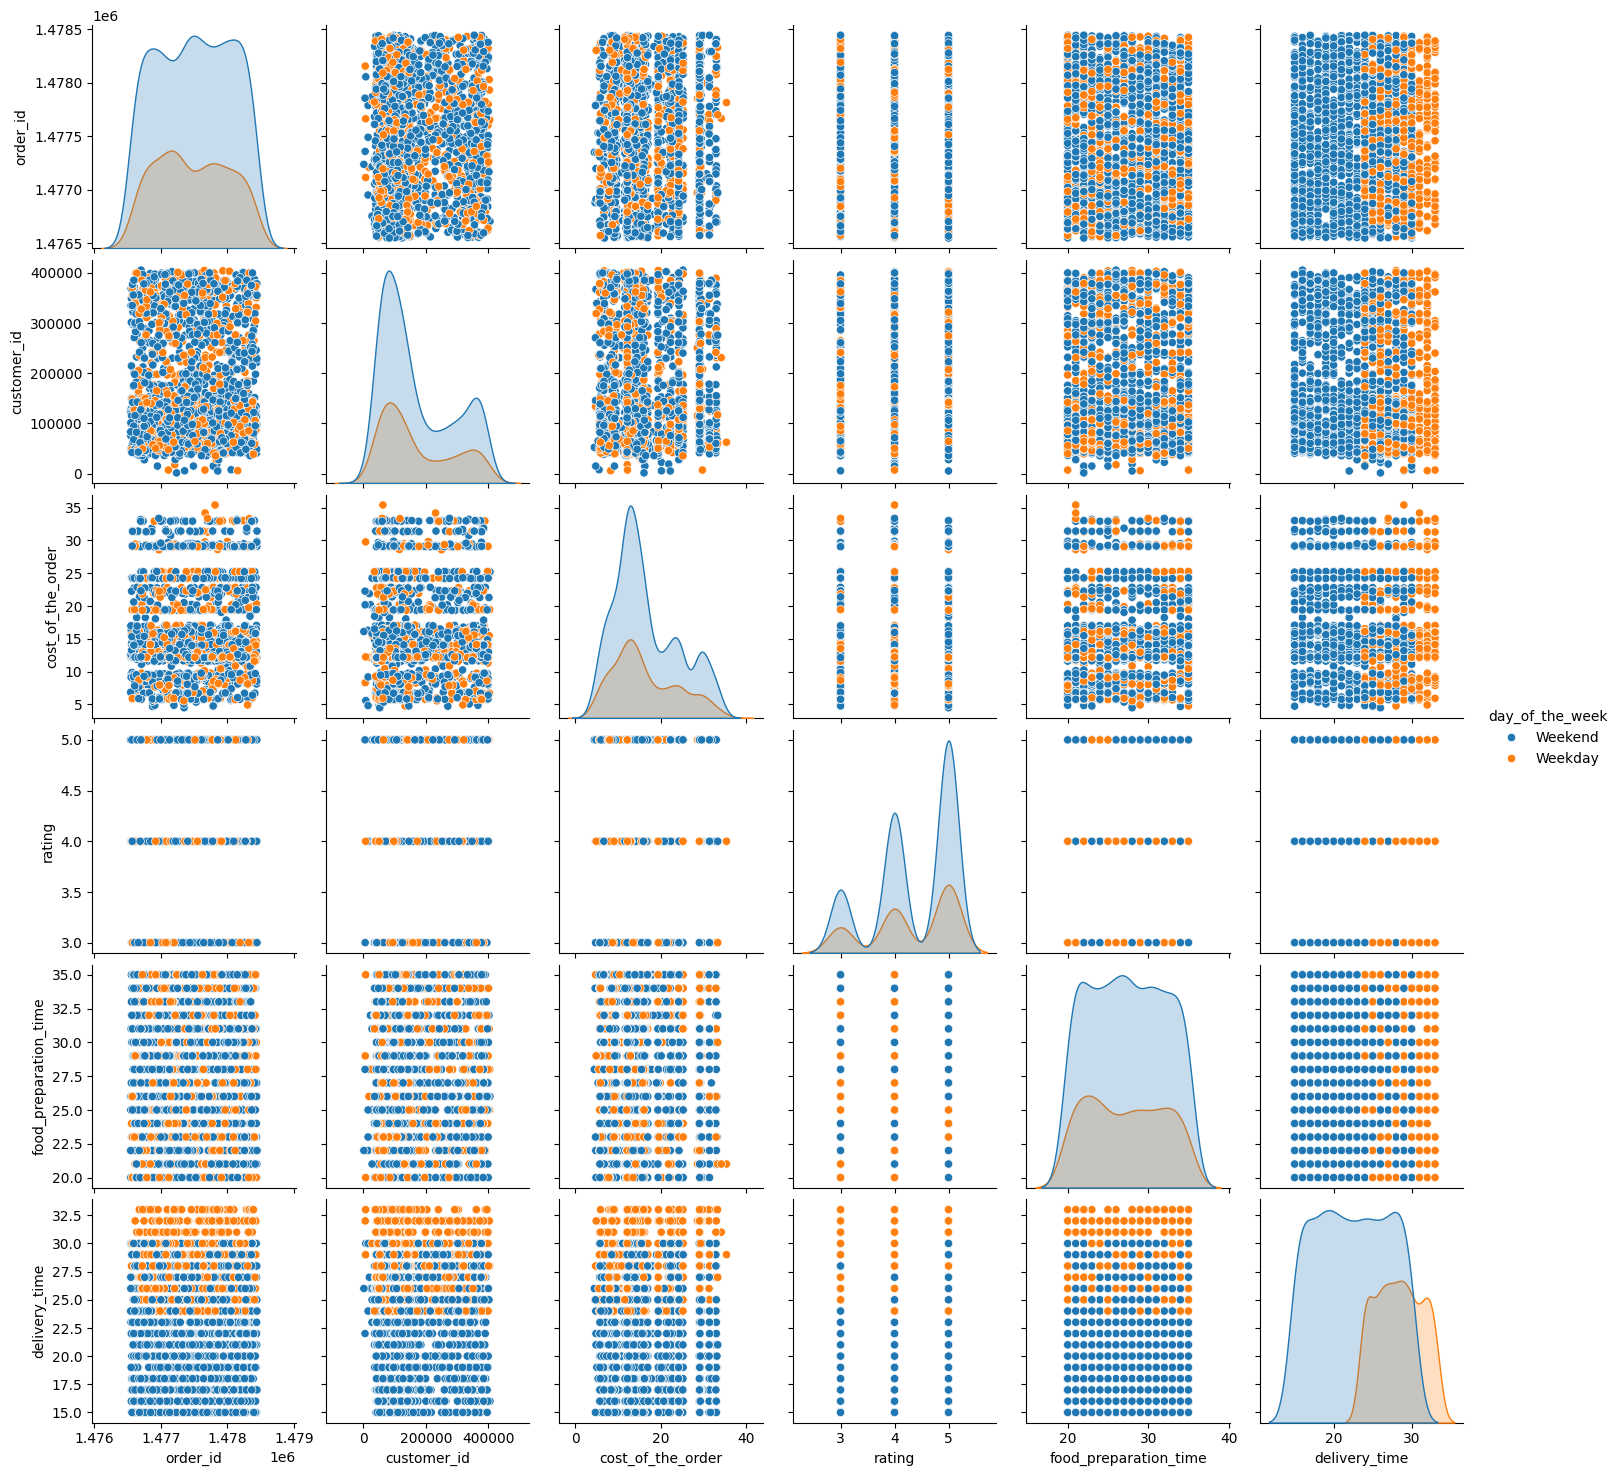

In [18]:
sns.pairplot(data_food_hub, hue='day_of_the_week')
plt.show()

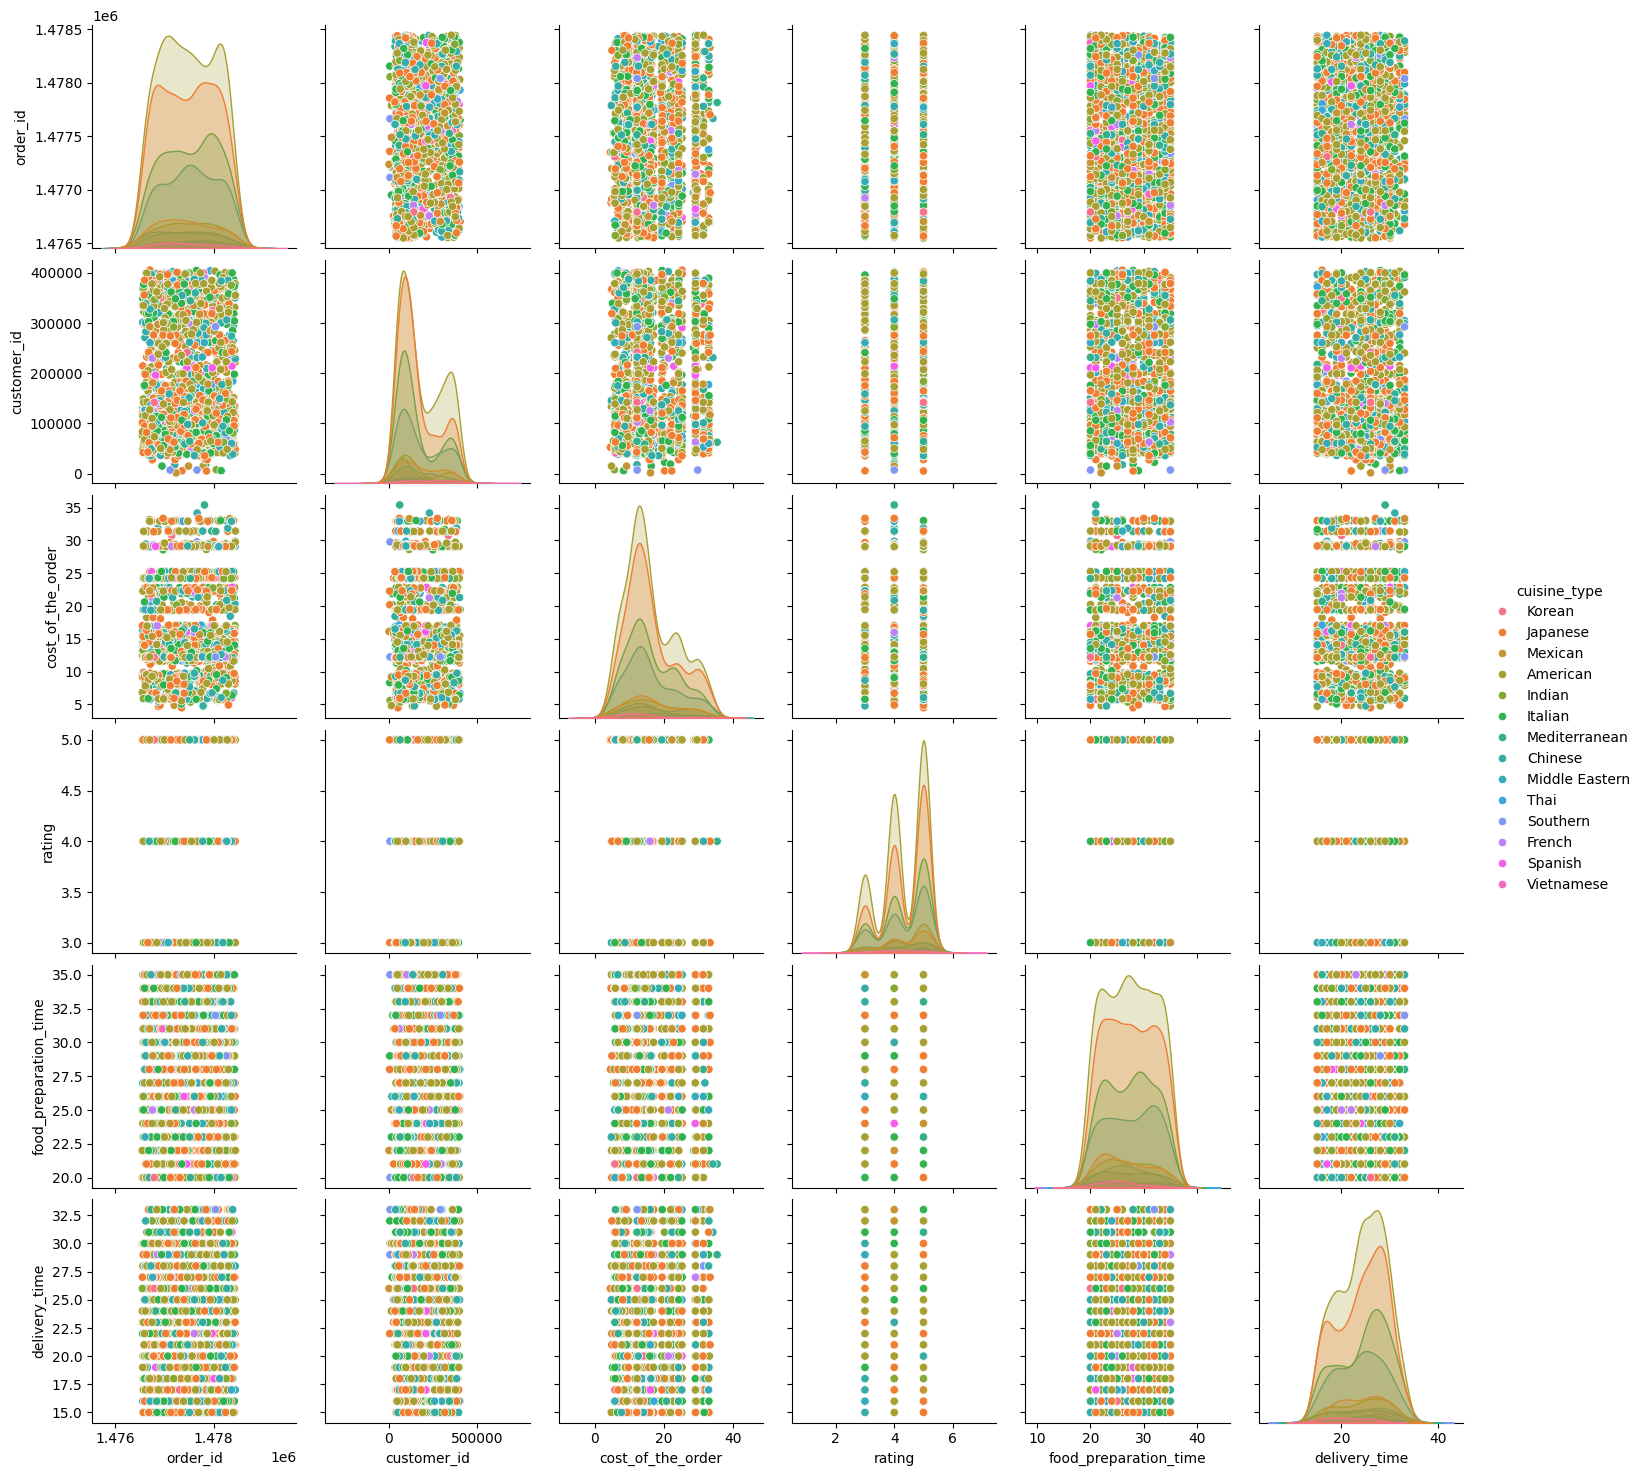

In [19]:
sns.pairplot(data_food_hub, hue='cuisine_type')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


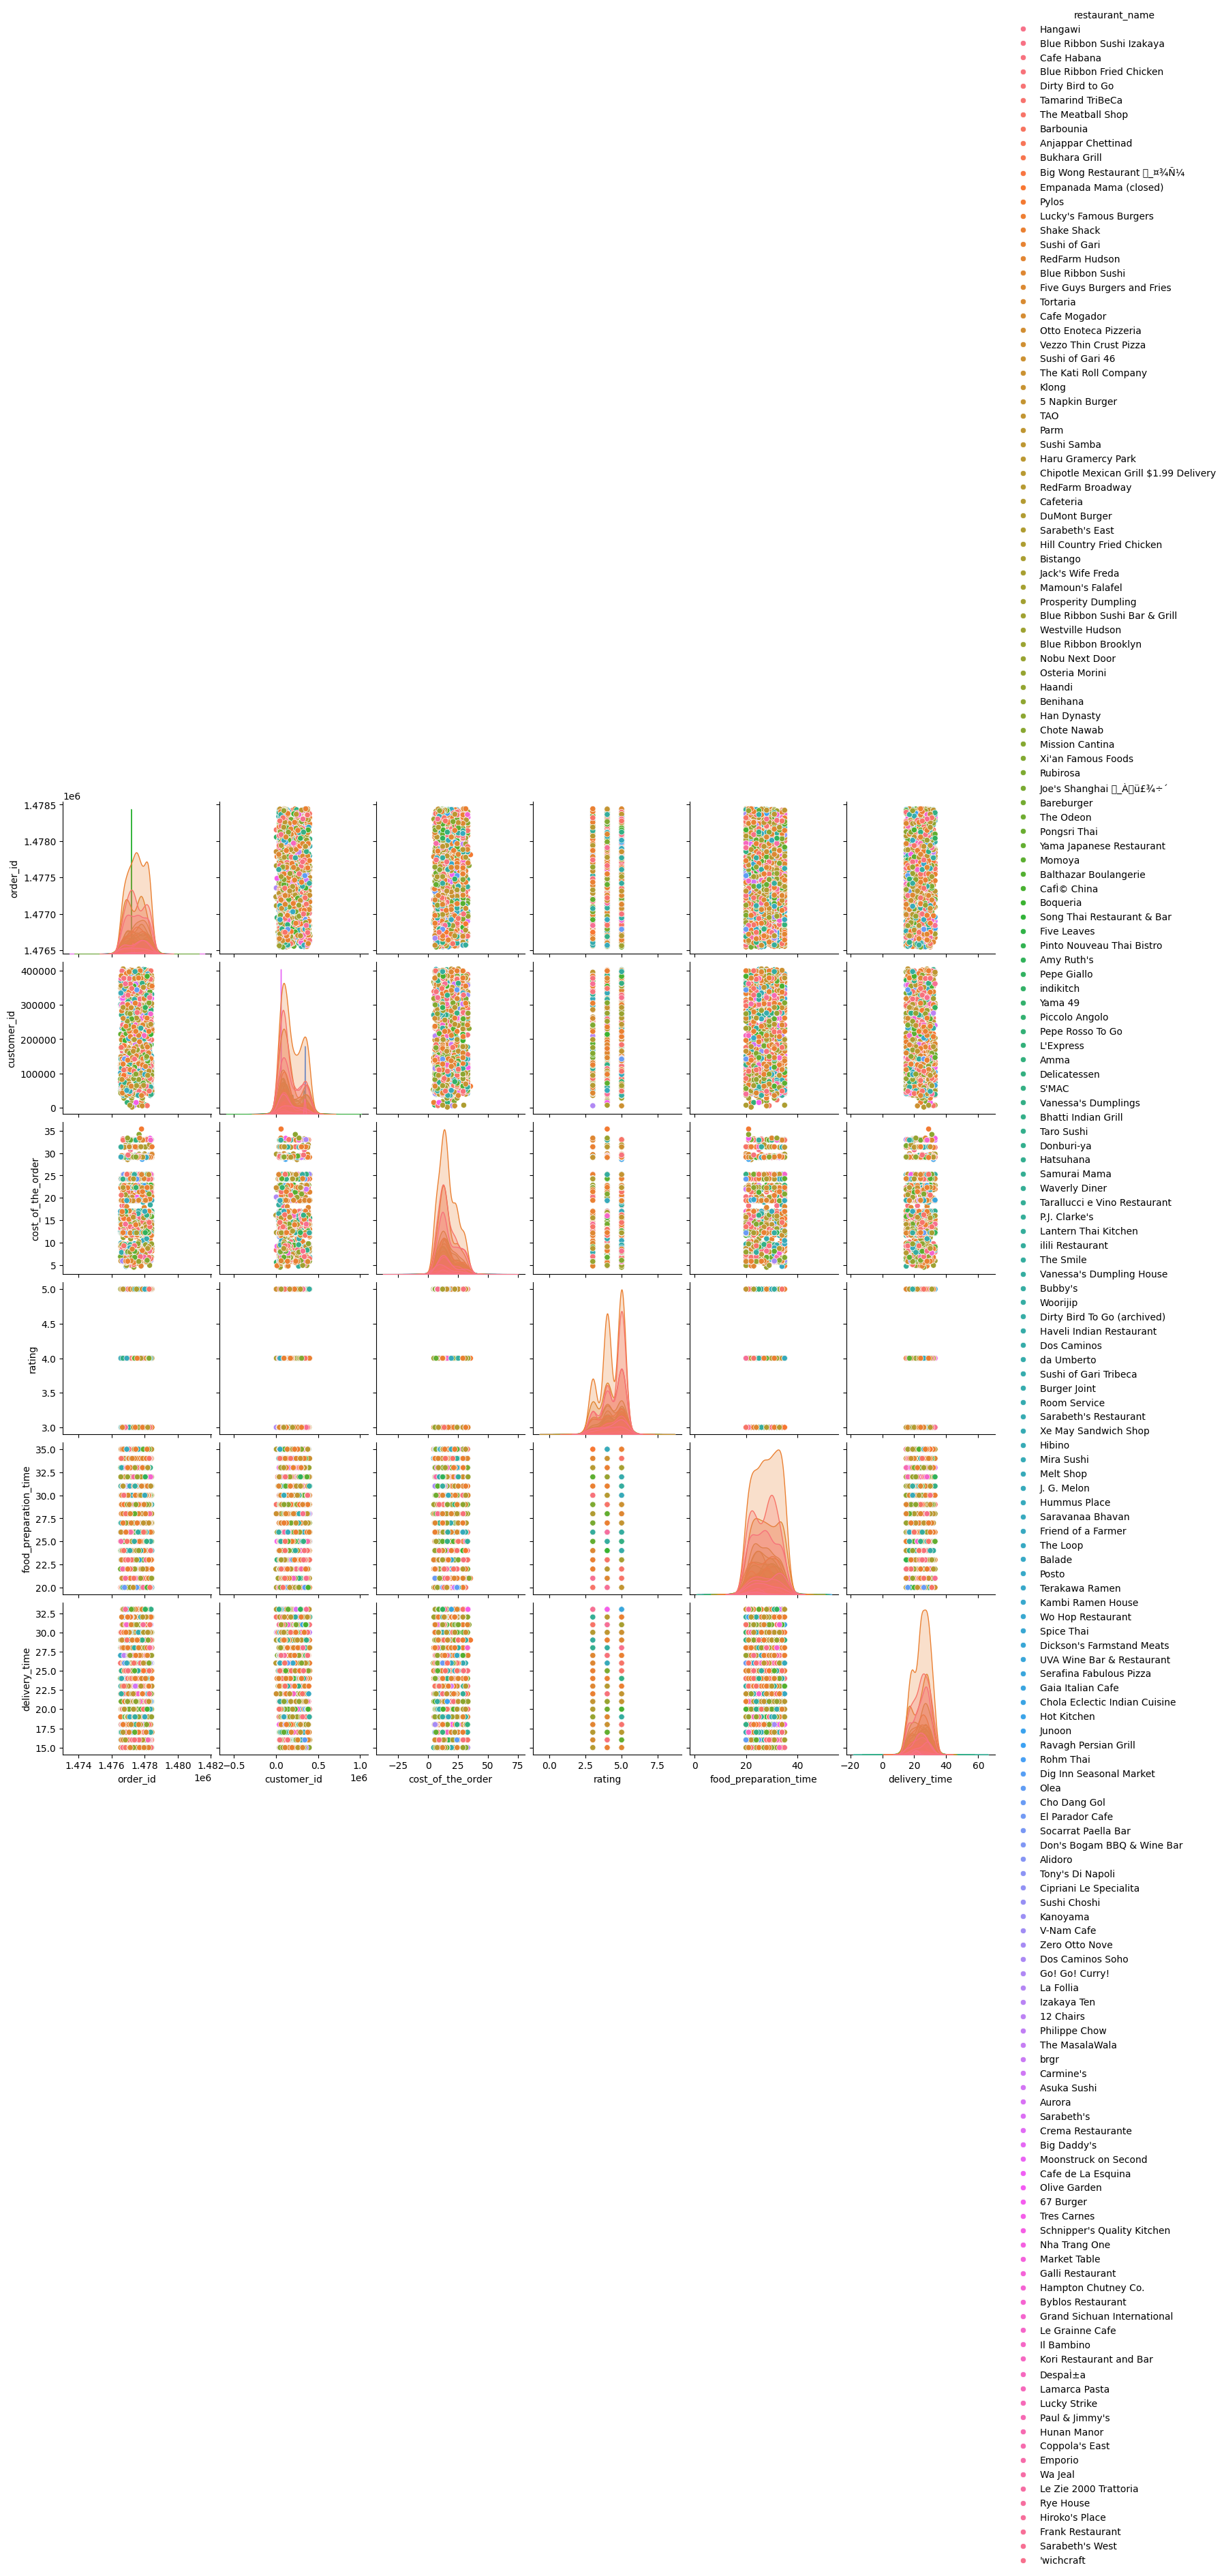

In [20]:
sns.pairplot(data_food_hub, hue='restaurant_name')
plt.show()

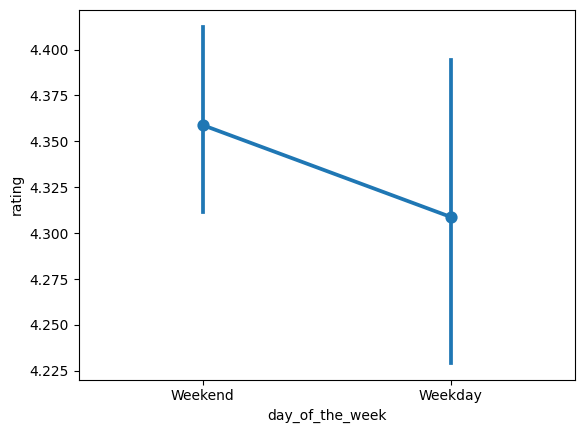

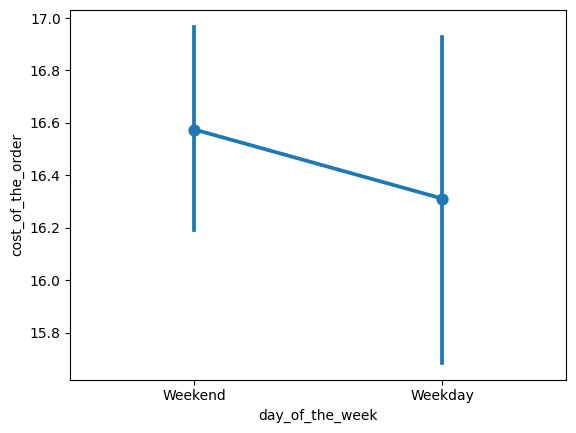

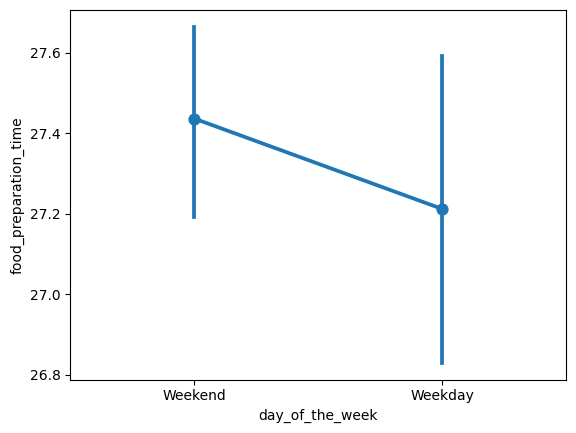

In [21]:
sns.pointplot(x='day_of_the_week', y='rating', data=data_food_hub)
plt.show()
sns.pointplot(x='day_of_the_week', y= 'cost_of_the_order', data=data_food_hub)
plt.show()
sns.pointplot(x='day_of_the_week', y= 'food_preparation_time', data=data_food_hub)
plt.show()

#### Observations:


*   There is no high relation between the numeric variables but day_of_the_week is directly impacting the order rating, cost_of_the_order and food_preparation time. (Using last pointplots)



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

               restaurant_name  rating_count  average_rating
153          The Meatball Shop            84        4.511905
20   Blue Ribbon Fried Chicken            64        4.328125
136                Shake Shack           133        4.278195
21           Blue Ribbon Sushi            73        4.219178


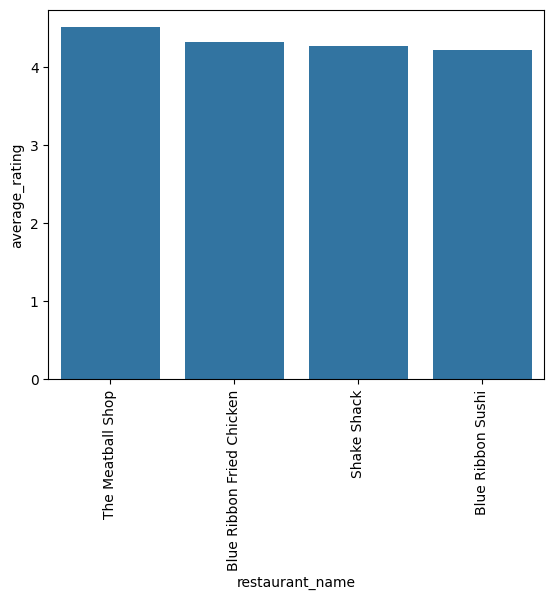

In [22]:
# Convert the 'rating' column to numeric, setting errors='coerce' to handle non-numeric values like 'Not given'
data_food_hub['rating'] = pd.to_numeric(data_food_hub['rating'], errors='coerce')

# Group by 'restaurant_name' and filter based on the conditions
promotional_restaurants = data_food_hub.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

# Apply the conditions: rating count > 50 and average rating > 4
promotional_restaurants = promotional_restaurants[(promotional_restaurants['rating_count'] > 50) & (promotional_restaurants['average_rating'] > 4)]

# Display the result
print(promotional_restaurants.sort_values(by='average_rating', ascending=False))
sns.barplot(x='restaurant_name', y='average_rating', data=promotional_restaurants,order=promotional_restaurants.sort_values('average_rating', ascending=False).restaurant_name)
plt.xticks(rotation=90)
plt.show()

#### Observations:
As we can see from the above calculation ther are only 4 such restaurants which satisfies the promotional offer criteria -
* The Meatball Shop having average rating of 4.51
* Blue Ribbon Fried Chicken having average rating of 4.33
* Shake Shack having average rating of 4.28
* Blue Ribbon Sushi having average rating of 4.22

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

revenue from orders cost greater than 20$ = 3688.7275
revenue from orders cost greater than 5$ = 2477.5755000000004
total revenue = 6166.303


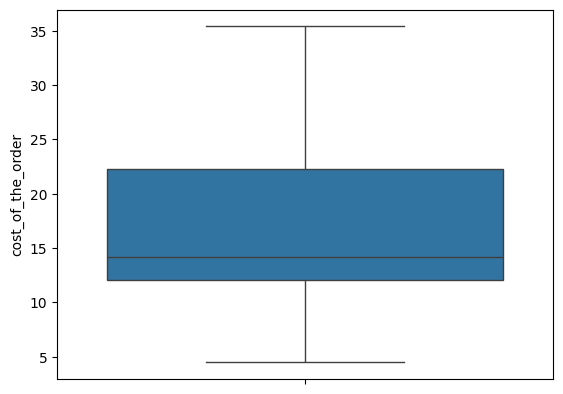

In [23]:
# Write the code here
total_revenue = (data_food_hub[data_food_hub['cost_of_the_order']>20]['cost_of_the_order'].sum() * 0.25) +(data_food_hub[(data_food_hub['cost_of_the_order']>5) & (data_food_hub['cost_of_the_order']<=20)]['cost_of_the_order'].sum() * 0.15)
print('revenue from orders cost greater than 20$ =',(data_food_hub[data_food_hub['cost_of_the_order']>20]['cost_of_the_order'].sum() * 0.25))
print('revenue from orders cost greater than 5$ =',(data_food_hub[(data_food_hub['cost_of_the_order']>5) & (data_food_hub['cost_of_the_order']<=20)]['cost_of_the_order'].sum() * 0.15))
print('total revenue =', total_revenue)
sns.boxplot(y=data_food_hub['cost_of_the_order'])
plt.show()

#### Observations:
From the above output it is clear that -


* Revenue from orders cost greater than 20 USD is 3688.7275 USD
* Revenue from orders cost greater than 5 USD is 2477.5755 USD
* So, the total revenue is 6166.303 USD.



### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

The percentage of the orders taking more than 60 minutes to be delivered since order placement is 10.537407797681771


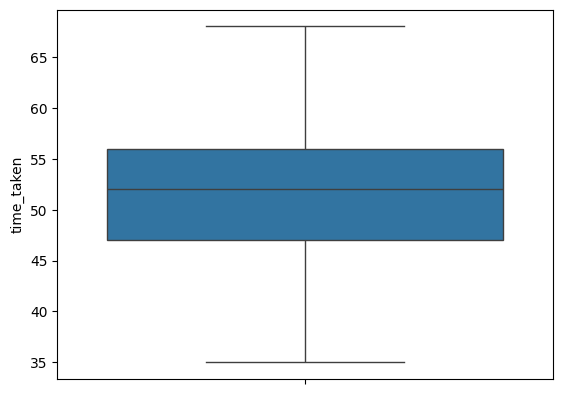

In [24]:
# Write the code here
data_food_hub['time_taken'] = data_food_hub['delivery_time'] + data_food_hub['food_preparation_time']
print('The percentage of the orders taking more than 60 minutes to be delivered since order placement is',data_food_hub[data_food_hub['time_taken'] > 60]['order_id'].count()/data_food_hub['order_id'].count()*100)
sns.boxplot(y=data_food_hub['time_taken'])
plt.show()

#### Observations:
The percentage of the orders taking more than 60 minutes to be delivered since order placement is 10.5374% (less than 25% as per the plot diagram)


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


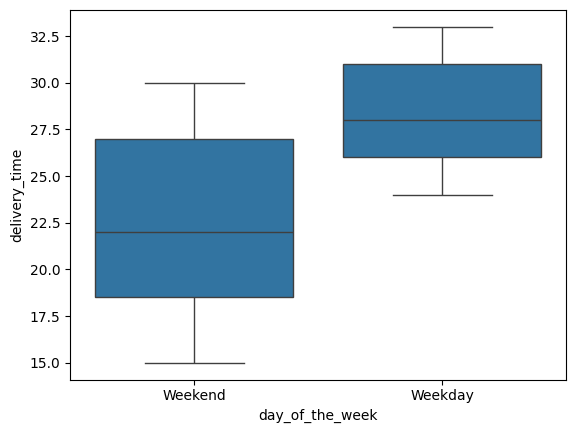

In [25]:
# Write the code here
print(data_food_hub.groupby('day_of_the_week')['delivery_time'].mean())
sns.boxplot(x='day_of_the_week', y='delivery_time', data=data_food_hub)
plt.show()

#### Observations:
* As we could see from the above data output and the box plot that the mean time of delivering an order in weekends is approx 22.5 minutes and in weekdays it is around 28.34 minutes which is ~25% higher than weekends.
* There could be several reasons such as road traffic or large number of orders for the higher delivery time on weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

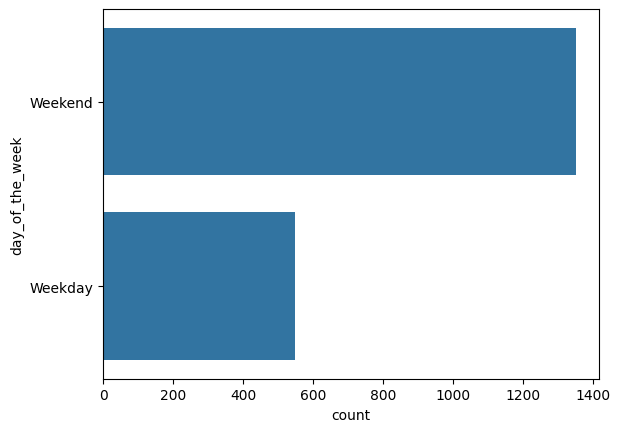

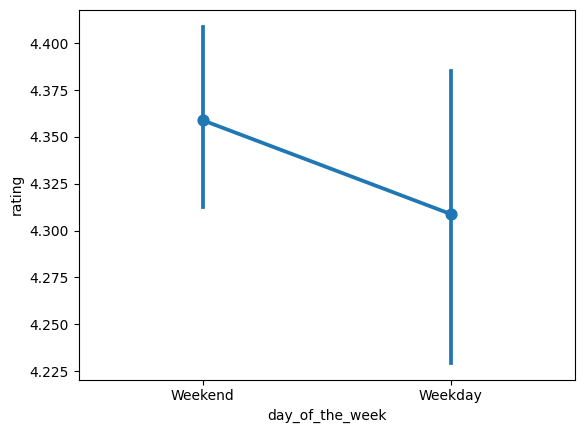

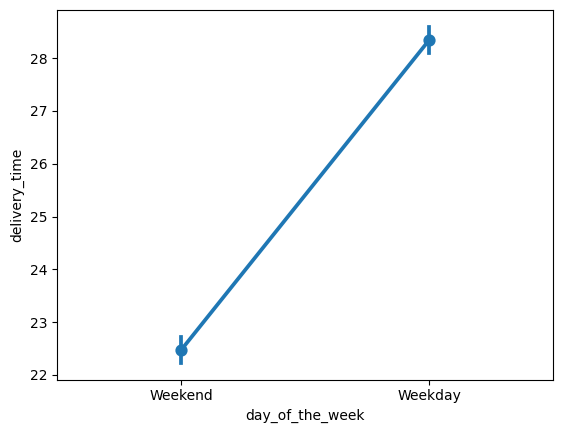

In [26]:
sns.countplot(y='day_of_the_week', data=data_food_hub)
plt.show()
print()
sns.pointplot(x='day_of_the_week', y='rating', data=data_food_hub)
plt.show()


print()
sns.pointplot(x='day_of_the_week', y= 'delivery_time', data=data_food_hub)
plt.show()

### Conclusions:
* On weekends, the demand is high but the customers are also rating higher as per the service. Which means weekends are the best productive days of the business.

* The most popular cuisines are American, Japenese and Italian. This defines the trend or space for new items to be tested in the same criteria which could impact the business in better way.

### Recommendations:

*  It is highly disturbing to see that despite getting the less orders on weekdays the customer is getting the order late due to high delivery time because of which customer is also giving less rating.
* It clearly shows that there is a room of improvement in the service on weekdays. We need to tackle the delivery time issue on weekdays to deliver good food and eperience to the customer.